In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel('mock_dataset.xlsx')

In [7]:
df

,id,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
0,1,keyboard,Rs.70000,dell-d11,flat ten,0,1,3.8,Y,Noida,OneYr
1,2,mobile,80k,logitech K120,none,0,1,NaN,0,pune,NaN
2,3,headphone,100$,classmate,flat ten,1,0,4.5,1,Bangalore,1 year
3,4,accessories,"rs1,299",dell-d11,NaN,1,0,3,Y,Delhi,OneYr
4,5,books,899rs/-,classmate,NaN,0,0,4.5,1,Noida,OneYr
...,...,...,...,...,...,...,...,...,...,...,...
995,996,keyboard,80k,Samsung S-12,none,1,1,four,YES,pune,OneYr
996,997,tablet,80k,boAT-B19,upto 30%,1,1,five,yes,Hyderabad,12 months
997,998,tablet,100$,lenovo L11,none,0,0,3.8,YES,Bangalore,12 months
998,999,books,500rs+50$,classmate,flat ten,0,1,3,Y,mumbai,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   product      1000 non-null   object
 2   price        1000 non-null   object
 3   brand_model  893 non-null    object
 4   discount     881 non-null    object
 5   Amazon       1000 non-null   int64 
 6   Flipkart     1000 non-null   int64 
 7   rating       868 non-null    object
 8   stock        1000 non-null   object
 9   seller_city  1000 non-null   object
 10  warranty     683 non-null    object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [9]:
df.isnull().sum()

id               0
product          0
price            0
brand_model    107
discount       119
Amazon           0
Flipkart         0
rating         132
stock            0
seller_city      0
warranty       317
dtype: int64

In [10]:
df.duplicated().any()  
df.duplicated(subset='id').any()

False

In [11]:
df.columns

Index(['id', 'product', 'price', 'brand_model', 'discount', 'Amazon',
       'Flipkart', 'rating', 'stock', 'seller_city', 'warranty'],
      dtype='object')

In [12]:
df.columns[[3,4,10]]

Index(['brand_model', 'discount', 'warranty'], dtype='object')

In [13]:
for i in df.columns[[3,4,10]]:
    df[i]=df[i].fillna('Unknown')

# 1st method


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   product      1000 non-null   object
 2   price        1000 non-null   object
 3   brand_model  1000 non-null   object
 4   discount     1000 non-null   object
 5   Amazon       1000 non-null   int64 
 6   Flipkart     1000 non-null   int64 
 7   rating       868 non-null    object
 8   stock        1000 non-null   object
 9   seller_city  1000 non-null   object
 10  warranty     1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [15]:
# df[df.columns[[3,4,10]]].fillna('Unknown')

# 2nd method

In [16]:
# df[['brand_model', 'discount', 'warranty']].fillna('Unknown')

In [17]:
df['rating'].unique()

array([3.8, nan, 4.5, 3, 'five', 'four', 5, 4.2], dtype=object)

In [18]:
df['rating']=df['rating'].replace({'five':5,'four':4}).astype(float).round(1)

In [19]:
df['rating'].unique()

array([3.8, nan, 4.5, 3. , 5. , 4. , 4.2])

<Axes: xlabel='rating'>

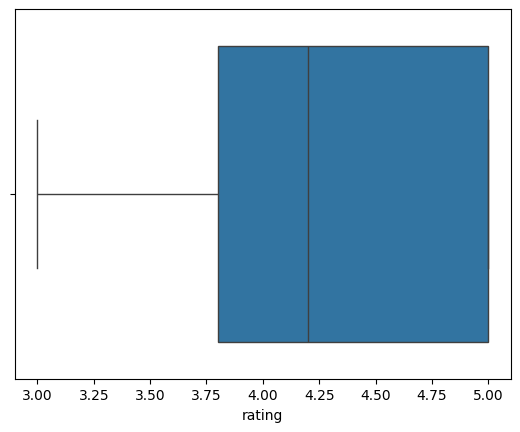

In [20]:
sns.boxplot(df,x='rating') #check for outlier if no outlier mean if outlier is there median and for cateigoral we use mode

In [21]:
df['rating']=df['rating'].fillna(df['rating'].mean())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   product      1000 non-null   object 
 2   price        1000 non-null   object 
 3   brand_model  1000 non-null   object 
 4   discount     1000 non-null   object 
 5   Amazon       1000 non-null   int64  
 6   Flipkart     1000 non-null   int64  
 7   rating       1000 non-null   float64
 8   stock        1000 non-null   object 
 9   seller_city  1000 non-null   object 
 10  warranty     1000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 86.1+ KB


In [23]:
df=df.set_index('id')

In [24]:
df

,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
id,,,,,,,,,,
1,keyboard,Rs.70000,dell-d11,flat ten,0,1,3.800000,Y,Noida,OneYr
2,mobile,80k,logitech K120,none,0,1,4.201498,0,pune,Unknown
3,headphone,100$,classmate,flat ten,1,0,4.500000,1,Bangalore,1 year
4,accessories,"rs1,299",dell-d11,Unknown,1,0,3.000000,Y,Delhi,OneYr
5,books,899rs/-,classmate,Unknown,0,0,4.500000,1,Noida,OneYr
...,...,...,...,...,...,...,...,...,...,...
996,keyboard,80k,Samsung S-12,none,1,1,4.000000,YES,pune,OneYr
997,tablet,80k,boAT-B19,upto 30%,1,1,5.000000,yes,Hyderabad,12 months
998,tablet,100$,lenovo L11,none,0,0,3.800000,YES,Bangalore,12 months


In [25]:
df.columns[[0,1,2,3,7]]

Index(['product', 'price', 'brand_model', 'discount', 'stock'], dtype='object')

In [26]:
for col in  df.columns[[0,1,2,3,7]]:
    print('-'*10,col,'-'*50)
    print(df[col].unique(),end='\n\n')
 
 

---------- product --------------------------------------------------
['keyboard' 'mobile' 'headphone' 'accessories' 'books' 'earphones'
 'laptop' 'tablet']

---------- price --------------------------------------------------
['Rs.70000' '80k' '100$' 'rs1,299' '899rs/-' '50$' 'USD 200' 15000
 '500rs+50$' 'one thousand rs' '15000rs + tax' 399 '50$+500rs' '100rs']

---------- brand_model --------------------------------------------------
['dell-d11' 'logitech K120' 'classmate' 'acer Aspire 5' 'vivo,V1.'
 'Unknown' 'apple-13' 'lenovo tab M10' 'samsung S12' 'boAT-B19' 'HP-H01'
 'samsung,s12' 'JBL_450BT' 'Mi-Cable' 'Samsung S-12' 'boAT-B11'
 'lenovo L11' 'boat b11' 'flat 10%' 'flat 20%' 'flat ten' 'upto 30%'
 'flat 15%']

---------- discount --------------------------------------------------
['flat ten' 'none' 'Unknown' 'flat 10%' 'upto 30%' '10 percent' 'flat 20%'
 0.2 'flat 15%' '0.2' 'HP-H01' 'JBL_450BT' 'samsung s12' 'samsung,s12']

---------- stock -------------------------------------

In [27]:
df['product']=df['product'].str.title()

In [28]:
df['stock']=df['stock'].replace({'yes':1,"Y":1,'no':0,'0':0,'1':1,'YES':1,'NO':0})

In [29]:
df.loc[df['discount'].isin(['HP-H01','JBL_450BT','samsung s12','samsung,s12'])]

,product,price,brand_model,discount,Amazon,Flipkart,rating,stock,seller_city,warranty
id,,,,,,,,,,
329,Headphone,"rs1,299",flat 10%,HP-H01,0,0,3.0,0,pune,Unknown
330,Headphone,100rs,flat 20%,JBL_450BT,1,0,5.0,1,delhi,12 months
380,Keyboard,one thousand rs,flat ten,samsung s12,1,1,5.0,0,Bangalore,6 months
381,Earphones,50$,upto 30%,"samsung,s12",0,0,4.2,0,BLR,12 months
382,Tablet,Rs.70000,flat 15%,"samsung,s12",1,0,3.8,1,bangalore,1 year


In [30]:
def dis(row):
    #scalar data both means not a collection its is primitive data
    bm=row['brand_model']
    d=row['discount']
    if d in ['HP-H01','JBL_450BT','samsung s12','samsung,s12']:
        return bm
    else:
        return d
def brand(row):
    #scalar data both means not a collection its is primitive data
    bm=row['brand_model']
    d=row['discount']
    if bm in ['flat 10%','flat 20%','flat ten','upto 30%','flat 15%']:
        return d
    else:
        return bm

In [31]:
df.apply(dis,axis=1).unique()


array(['flat ten', 'none', 'Unknown', 'flat 10%', 'upto 30%',
       '10 percent', 'flat 20%', 0.2, 'flat 15%', '0.2'], dtype=object)

In [32]:

df.apply(brand,axis=1).unique()


array(['dell-d11', 'logitech K120', 'classmate', 'acer Aspire 5',
       'vivo,V1.', 'Unknown', 'apple-13', 'lenovo tab M10', 'samsung S12',
       'boAT-B19', 'HP-H01', 'samsung,s12', 'JBL_450BT', 'Mi-Cable',
       'Samsung S-12', 'boAT-B11', 'lenovo L11', 'boat b11',
       'samsung s12'], dtype=object)

In [33]:
def swap(row):
    #scalar data both means not a collection its is primitive data
    bm=row['brand_model']
    d=row['discount']
    if bm in ['flat 10%','flat 20%','flat ten','upto 30%','flat 15%']:
        return [d,bm]
    else:
        return [bm,d]
df.apply(swap,axis=1)


id
1            [dell-d11, flat ten]
2           [logitech K120, none]
3           [classmate, flat ten]
4             [dell-d11, Unknown]
5            [classmate, Unknown]
                  ...            
996          [Samsung S-12, none]
997          [boAT-B19, upto 30%]
998            [lenovo L11, none]
999         [classmate, flat ten]
1000    [logitech K120, flat 15%]
Length: 1000, dtype: object

In [34]:
df[['brand_model','discount']]=df.apply(swap,axis=1).astype(str).str.strip("['").str.strip("]'").str.rsplit(',',expand=True,n=1)

In [35]:
df.apply(swap,axis=1)

id
1            [dell-d11',  'flat ten]
2           [logitech K120',  'none]
3           [classmate',  'flat ten]
4             [dell-d11',  'Unknown]
5            [classmate',  'Unknown]
                    ...             
996          [Samsung S-12',  'none]
997          [boAT-B19',  'upto 30%]
998            [lenovo L11',  'none]
999         [classmate',  'flat ten]
1000    [logitech K120',  'flat 15%]
Length: 1000, dtype: object